In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('bosch_small_data/train_numeric.csv',low_memory=False)

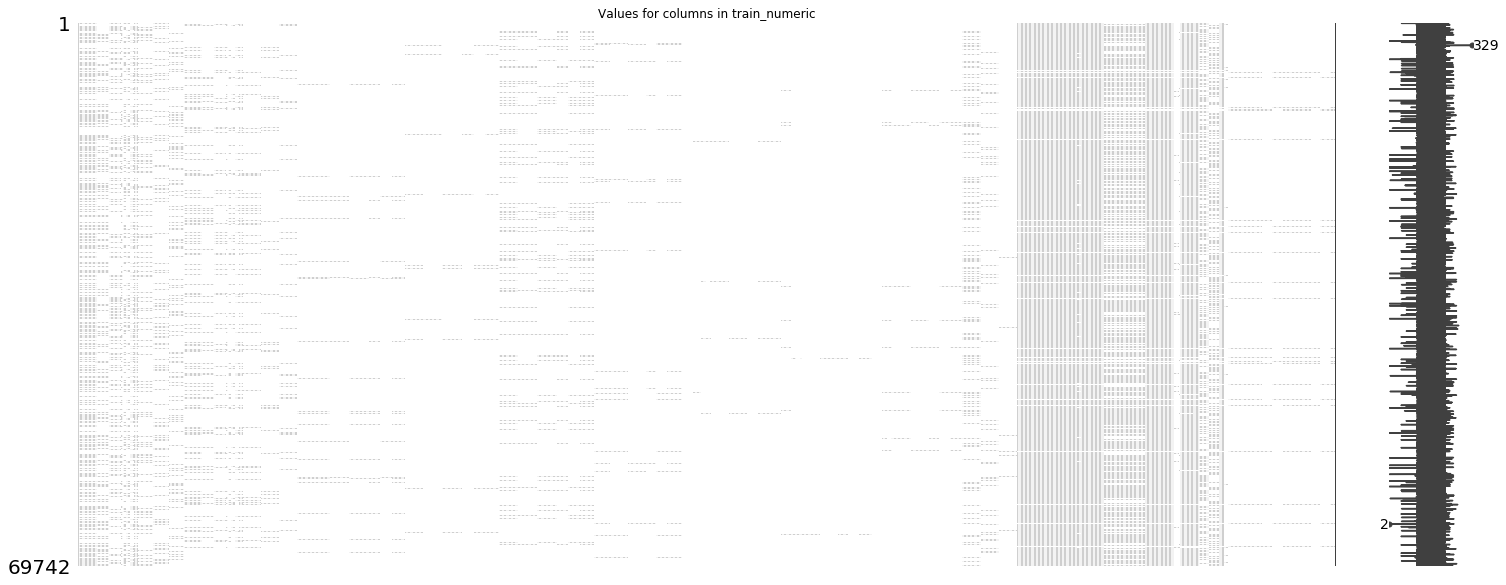

In [3]:
msno.matrix(all_data)
plt.title('Values for columns in train_numeric')
plt.savefig('missing_values.png')

In [4]:
all_data.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,71,-0.167,-0.168,0.276,0.330,0.074,0.161,0.052,0.248,0.163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,86,-0.003,0.041,-0.033,-0.016,0.074,0.161,0.000,-0.072,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
breakup_strings = list(all_data.columns)[1:-1]
breakup_strings = [i.split('_') for i in breakup_strings]

In [6]:
list_features = set([i[0] for i in breakup_strings[0:-1]])
station_features = set([i[1] for i in breakup_strings[0:-1]])
form_features = set([i[2] for i in breakup_strings[0:-1]])

In [9]:
def get_ratio(column):
    all_response = all_data[[column,'Response']].dropna()['Response']
    return [column, all_response.sum()/len(all_response)]

In [10]:
vals = [get_ratio(i) for i in all_data.columns[1:-1]]

In [11]:
new_corr = pd.DataFrame(vals)

In [24]:
sorted_corr = new_corr.sort_values(by=[1],ascending=False)

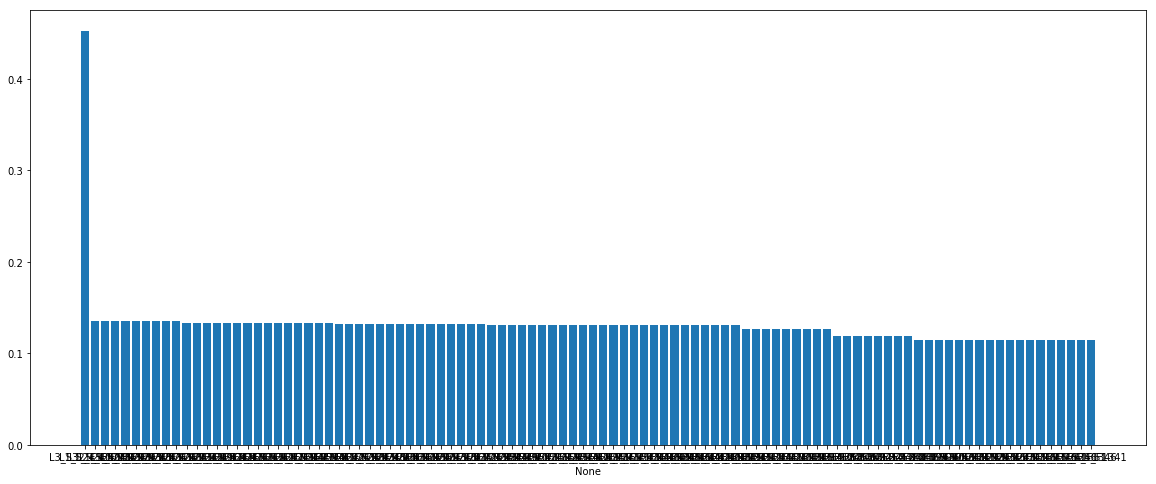

In [27]:
plt.figure(figsize=(20,8))
plt.bar(sorted_corr[0].values,sorted_corr[1].values)
plt.xlabel(None)
plt.show()